In [30]:
import sys
sys.path.append('..')

from collections import Counter

import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
import seaborn as sns
from icr.structs.game import Game

sns.set(font='cmtt10', style="white", font_scale=1.2)

In [8]:
CODRAW_PATH = '../../data/data/CoDraw-master/dataset/CoDraw_1_0.json'
ANNOTATION_PATH = '../../data/codraw-icr-v2.tsv'

SPLITS = ('train', 'val', 'test')
INCLUDE_PEEK = True

In [9]:
with open(CODRAW_PATH, 'r') as f:
    codraw = json.load(f)
annotated = pd.read_csv(ANNOTATION_PATH , sep='\t')


icr_types = set([sent for sent in annotated['drawer']])

icrs = {name: [] for name in codraw['data'].keys()}
for _, row in annotated.iterrows():
    icrs[row.game_name].append(row.turn)

games = {name: Game(name, game_data, icrs[name], quick_load=False) for name, game_data in codraw['data'].items()}

How often the ambiguous labels, that was ignored, occur:

In [39]:
annotated.clipart_1.value_counts()['ambiguous'] + annotated.clipart_2.value_counts()['ambiguous'] + annotated.clipart_3.value_counts()['ambiguous'] + annotated.clipart_4.value_counts()['ambiguous'] + annotated.clipart_5.value_counts()['ambiguous']

318

Distribution of the number of actions:

In [14]:
n_actions_by_turn = [x for game in games.values() for x in game.actions.n_actions_per_turn()]
df_describe = pd.DataFrame(n_actions_by_turn)
df_describe.describe()

,0
count,77502.000000
mean,1.651893
std,1.697545
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,18.000000


In [23]:
counts = Counter(n_actions_by_turn)
labels = [x for x in range(30) if x in counts.keys()]
percs = [100 * counts[x] / sum(counts.values()) for x in labels]


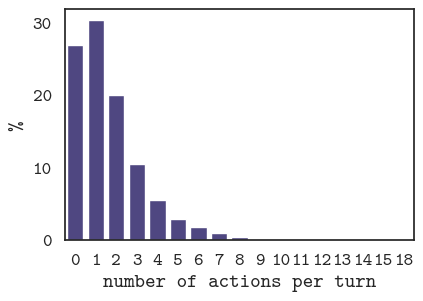

In [36]:
fig, ax = plt.subplots(figsize=(4.5, 3))
sns.barplot(x=labels, y=percs, color='darkslateblue')
plt.xlabel('number of actions per turn')
plt.ylabel('%')
plt.savefig('figures/actions-dist.pdf', bbox_inches='tight')
plt.show()